# Learning Scikit-learn: Machine Learning in Python

## Notebook for Chapter 3: Unsupervised Learning - Principal Component Analysis

In [3]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Load digits dataset

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

In [10]:
print (digits.keys())


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


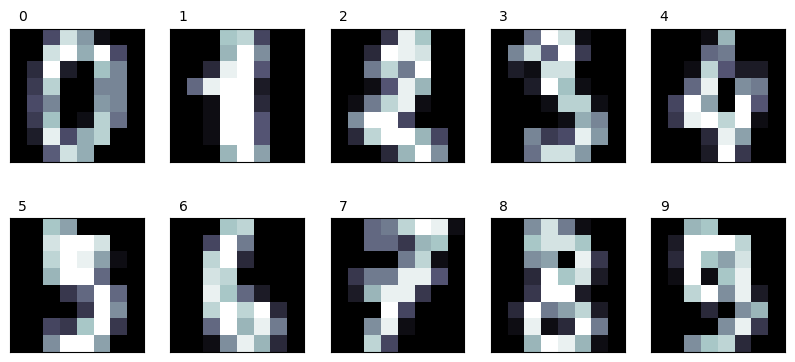

In [12]:
n_row, n_col = 2, 5

def print_digits(images, y, max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest')
        # label the image with the target value
        p.text(0, -1, str(y[i]))
        i = i + 1
    
print_digits(digits.images, digits.target, max_n=10)

Find components and plot first and second components

In [15]:
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in xrange(len(colors)):
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(digits.target_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')

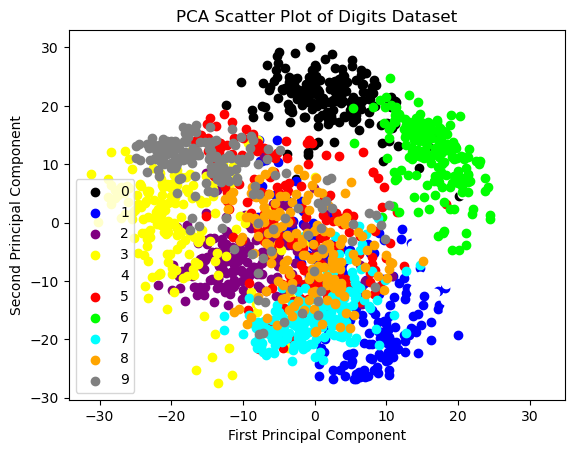

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Set the number of rows and columns for the plot grid
n_row, n_col = 2, 5

# Set the number of PCA components to the product of n_row and n_col
n_components = n_row * n_col
estimator = PCA(n_components=n_components)
X_pca = estimator.fit_transform(X_digits)

# Function to plot the PCA scatter plot
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i], label=digits.target_names[i])
    plt.legend()
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA Scatter Plot of Digits Dataset')
    plt.show()

# Plot the PCA scatter plot
plot_pca_scatter()


Show the different components

In [22]:
def print_pca_components(images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape((8, 8)), interpolation='nearest')
        plt.text(0, -1, str(i + 1) + '-component')
        plt.xticks(())
        plt.yticks(())

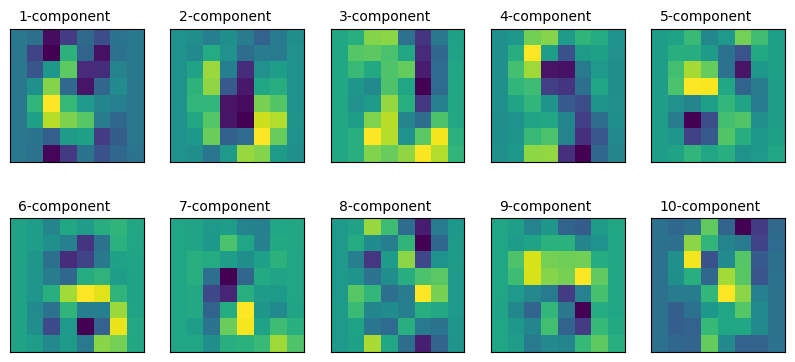

In [24]:
print_pca_components(estimator.components_[:n_components], n_col, n_row)